In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
import copy
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [53]:
ds = pd.ExcelFile('Dataset.xlsx')
dp = pd.read_excel(ds, header = 0, index_col=0)
dp

,Діагноз,пол,возраст,ЧДД в минуту,АД сист,АД диаст,Пульс,эритроциты,Hb,цветовой показатель,...,билирубин 3,АСТ,АЛТ,глюкоза,сиаловые кислоты,серомукоиды,удельный вес,белок,лейк п/зр,эритр неизм п/зр
№иб,,,,,,,,,,,,,,,,,,,,,
1440,ХОЗЛ,0,79,22,155,100,92,4.44,142.0,0.95,...,12.0,28.0,26.0,NaN,150.0,0.17,1022.0,0.090,4.0,5.0
1484,ХОЗЛ,0,76,23,140,90,85,4.30,134.0,0.90,...,8.0,33.0,29.0,4.3,170.0,0.14,1018.0,0.000,2.0,0.0
1497,ХОЗЛ,1,72,26,140,90,150,4.00,121.0,0.90,...,7.0,61.0,39.0,5.5,NaN,NaN,1018.0,0.000,2.0,0.0
1530,ХОЗЛ,1,54,26,140,90,90,4.57,141.0,0.90,...,7.0,44.0,27.0,4.3,NaN,NaN,1015.0,0.000,2.0,0.0
1583,ХОЗЛ,0,81,27,150,100,102,4.00,155.0,1.00,...,10.0,39.0,19.0,5.8,NaN,NaN,1024.0,0.000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Пневмонія,1,84,22,135,80,100,3.29,98.0,0.89,...,NaN,NaN,NaN,5.2,NaN,NaN,1016.0,0.033,6.0,0.0
5033,Пневмонія,0,67,24,160,90,70,4.10,131.0,0.95,...,NaN,NaN,NaN,NaN,NaN,NaN,1014.0,0.000,10.0,0.0
5079,Пневмонія,1,26,22,115,75,86,4.30,135.0,0.94,...,NaN,NaN,NaN,NaN,NaN,NaN,1015.0,0.075,2.0,0.0


In [54]:
#удалить столбцы с больше,чем 20% нулевых значений
dt= dp.dropna(axis = 1, thresh=int(0.8*len(dp)))
dt

,Діагноз,пол,возраст,ЧДД в минуту,АД сист,АД диаст,Пульс,эритроциты,Hb,цветовой показатель,лейкоциты,эозинофилы,палочкоядерные,сегментоядерные,лимфоциты,Моноциты,СОЭ,белок,лейк п/зр,эритр неизм п/зр
№иб,,,,,,,,,,,,,,,,,,,,
1440,ХОЗЛ,0,79,22,155,100,92,4.44,142.0,0.95,11.6,1.0,12.0,75.0,8.0,4.0,11.0,0.090,4.0,5.0
1484,ХОЗЛ,0,76,23,140,90,85,4.30,134.0,0.90,7.5,1.0,8.0,57.0,26.0,3.0,21.0,0.000,2.0,0.0
1497,ХОЗЛ,1,72,26,140,90,150,4.00,121.0,0.90,5.0,1.0,4.0,56.0,36.0,3.0,28.0,0.000,2.0,0.0
1530,ХОЗЛ,1,54,26,140,90,90,4.57,141.0,0.90,6.5,2.0,1.0,62.0,32.0,3.0,19.0,0.000,2.0,0.0
1583,ХОЗЛ,0,81,27,150,100,102,4.00,155.0,1.00,8.8,1.0,2.0,78.0,12.0,6.0,9.0,0.000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Пневмонія,1,84,22,135,80,100,3.29,98.0,0.89,7.7,1.0,4.0,72.0,18.0,7.0,30.0,0.033,6.0,0.0
5033,Пневмонія,0,67,24,160,90,70,4.10,131.0,0.95,16.5,1.0,5.0,76.0,14.0,3.0,31.0,0.000,10.0,0.0
5079,Пневмонія,1,26,22,115,75,86,4.30,135.0,0.94,6.9,1.0,7.0,54.0,34.0,4.0,13.0,0.075,2.0,0.0


In [55]:
dd = dt.rename(columns = {"Діагноз": "target"})

In [56]:
df = dd.fillna(dd.mean())

In [57]:
features = df.columns.values.tolist()[1:]
features

['пол',
 'возраст',
 'ЧДД в минуту',
 'АД сист',
 'АД диаст',
 'Пульс',
 'эритроциты',
 'Hb',
 'цветовой показатель',
 'лейкоциты',
 'эозинофилы',
 'палочкоядерные',
 'сегментоядерные',
 'лимфоциты',
 'Моноциты',
 'СОЭ',
 'белок',
 'лейк п/зр',
 'эритр неизм п/зр']

In [58]:
x = df.loc[:,features].values
x

array([[0.0e+00, 7.9e+01, 2.2e+01, ..., 9.0e-02, 4.0e+00, 5.0e+00],
       [0.0e+00, 7.6e+01, 2.3e+01, ..., 0.0e+00, 2.0e+00, 0.0e+00],
       [1.0e+00, 7.2e+01, 2.6e+01, ..., 0.0e+00, 2.0e+00, 0.0e+00],
       ...,
       [1.0e+00, 2.6e+01, 2.2e+01, ..., 7.5e-02, 2.0e+00, 0.0e+00],
       [0.0e+00, 8.2e+01, 2.4e+01, ..., 3.0e-02, 5.0e+00, 7.0e+00],
       [1.0e+00, 3.5e+01, 2.2e+01, ..., 0.0e+00, 6.0e+00, 0.0e+00]])

In [59]:
y = df.loc[:,'target'].values
print(y)

['ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ'
 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ'
 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ'
 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ'
 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА'
 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА'
 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА'
 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА'
 'БА' 'БА' 'БА' 'БА' 'БА' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія'
 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія'
 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія'
 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія'
 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія'
 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія']


In [60]:
scaler = MinMaxScaler().fit_transform(x)
print(scaler[:10,:])

[[0.         0.85915493 0.38888889 0.79166667 0.85714286 0.38297872
  0.24223602 0.5952381  0.60526316 0.18727915 0.         0.16176471
  0.85714286 0.07575758 0.11111111 0.125      1.         0.1
  0.625     ]
 [0.         0.81690141 0.44444444 0.66666667 0.71428571 0.30851064
  0.21325052 0.5        0.47368421 0.11484099 0.         0.10294118
  0.64285714 0.34848485 0.05555556 0.26388889 0.         0.05
  0.        ]
 [1.         0.76056338 0.61111111 0.66666667 0.71428571 1.
  0.15113872 0.3452381  0.47368421 0.07067138 0.         0.04411765
  0.63095238 0.5        0.05555556 0.36111111 0.         0.05
  0.        ]
 [1.         0.50704225 0.61111111 0.66666667 0.71428571 0.36170213
  0.26915114 0.58333333 0.47368421 0.09717314 0.16666667 0.
  0.70238095 0.43939394 0.05555556 0.23611111 0.         0.05
  0.        ]
 [0.         0.88732394 0.66666667 0.75       0.85714286 0.4893617
  0.15113872 0.75       0.73684211 0.13780919 0.         0.01470588
  0.89285714 0.13636364 0.22222222

In [61]:
scaler.shape

(132, 19)

In [62]:
x_stan = StandardScaler().fit_transform(x)
print(x_stan[:2,:])

[[-0.89901011  1.61826478 -0.38837368  1.47966207  1.921851    0.30042152
   0.09099696  0.31843575  0.47565787  0.65691907 -0.46100148  0.62234291
   0.94327065 -1.70777768 -0.22090137 -0.40158005  4.94688553 -0.08531714
   3.60959333]
 [-0.89901011  1.43326684 -0.09031946  0.47460859  0.80675504 -0.18915429
  -0.2036907  -0.22005723 -0.53803923 -0.16712862 -0.46100148  0.22083136
  -0.46621423  0.17101864 -0.63114678  0.37068928 -0.32102752 -0.54745165
  -0.29429297]]


In [63]:
from sklearn import metrics
import copy
y_k = copy.copy(y)
y_k[y =='ХОЗЛ'] = 0
y_k[y =='БА'] = 1
y_k[y =='Пневмонія'] = 2

In [64]:
diagnoz = np.array(y_k)

In [76]:
y_k

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=object)

In [65]:
x_data = SelectKBest(f_classif, k=3).fit_transform(scaler, y)
x_data

array([[0.        , 0.5952381 , 0.125     ],
       [0.        , 0.5       , 0.26388889],
       [1.        , 0.3452381 , 0.36111111],
       [1.        , 0.58333333, 0.23611111],
       [0.        , 0.75      , 0.09722222],
       [0.        , 0.78571429, 0.02777778],
       [1.        , 0.17857143, 0.19444444],
       [0.        , 0.45238095, 0.16666667],
       [1.        , 0.53571429, 0.20833333],
       [1.        , 0.94047619, 0.02777778],
       [0.        , 0.70238095, 0.09722222],
       [0.        , 0.80952381, 0.125     ],
       [0.        , 0.41666667, 0.08333333],
       [0.        , 0.52380952, 0.06944444],
       [0.        , 0.4047619 , 0.09722222],
       [0.        , 0.66666667, 0.01388889],
       [0.        , 0.51190476, 0.26388889],
       [0.        , 0.47619048, 0.02777778],
       [0.        , 0.55952381, 0.18055556],
       [0.        , 0.80952381, 0.11111111],
       [0.        , 0.70238095, 0.09722222],
       [0.        , 0.77380952, 0.11111111],
       [0.

In [66]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_k, test_size = 0.33, 
                                                    random_state = 7)
x_train

array([[0.        , 0.4047619 , 0.48611111],
       [0.        , 0.80952381, 0.04166667],
       [1.        , 0.51190476, 0.02777778],
       [0.        , 0.64285714, 0.11111111],
       [0.        , 0.41666667, 0.08333333],
       [1.        , 0.48809524, 0.20833333],
       [0.        , 0.77380952, 0.08333333],
       [0.        , 0.80952381, 0.125     ],
       [1.        , 0.58333333, 0.23611111],
       [1.        , 0.41666667, 0.15277778],
       [0.        , 0.55952381, 0.18055556],
       [1.        , 0.71428571, 0.11111111],
       [1.        , 0.51190476, 0.25      ],
       [1.        , 0.3452381 , 0.36111111],
       [1.        , 0.5952381 , 0.11111111],
       [0.        , 0.47619048, 0.02777778],
       [0.        , 0.61904762, 0.34722222],
       [1.        , 0.36904762, 0.125     ],
       [1.        , 0.57142857, 0.20833333],
       [1.        , 0.07142857, 0.38888889],
       [0.        , 0.36904762, 0.19444444],
       [0.        , 0.78571429, 0.11111111],
       [0.

In [67]:
from sklearn.linear_model import LinearRegression
regModel = LinearRegression()
regModel.fit(x_train, y_train)

b_0 = regModel.intercept_
b_1 = regModel.coef_
print(b_0, b_1)
y_pr_train = regModel.predict(x_train)#предсказание 
y_pr_test = regModel.predict(x_test)#выборка для предсказаний

0.6956811741935855 [ 0.1406247  -0.51337489  1.78534467]


In [68]:
y_pr_train

array([1.35576246, 0.35448134, 0.62309973, 0.56402609, 0.63055369,
       0.95767684, 0.44720551, 0.50326006, 0.9583769 , 0.89516066,
       0.7307896 , 0.66798116, 1.01984299, 1.30377711, 0.72909721,
       0.50080985, 0.99778901, 0.87001418, 0.9148956 , 1.49393695,
       0.85337174, 0.49068682, 0.88969135, 1.1764257 , 0.43899373,
       0.37246612, 1.36088174, 0.88363751, 0.49679842, 0.90738388,
       0.84429881, 2.00960096, 0.83910612, 0.97706175, 0.5086716 ,
       1.6968012 , 0.66798116, 0.66081946, 0.70739326, 0.90401474,
       0.71722403, 0.91012635, 1.31530026, 0.70465079, 1.81292171,
       0.82421384, 0.91174782, 0.40308192, 0.48422518, 0.5562221 ,
       0.79190566, 0.73520882, 0.84626782, 0.63125375, 1.40570539,
       0.36635452, 0.68631597, 1.1027364 , 1.45901746, 0.90506483,
       0.54569127, 0.69172752, 0.87001418, 0.6227497 , 0.4784636 ,
       1.09178214, 0.62344976, 0.8714143 , 0.61326896, 0.37927779,
       0.7609976 , 0.84626782, 0.98177324, 0.58812248, 0.46519

In [69]:
y_pr_test

array([0.49068682, 1.09318226, 0.60069572, 0.30558849, 1.9050036 ,
       0.6227497 , 0.43934376, 0.50692145, 0.50150991, 0.92269959,
       0.8914415 , 1.10715563, 0.5388796 , 0.747082  , 0.36024291,
       0.51920243, 0.34190809, 1.0459818 , 0.25669564, 0.45837864,
       1.06873584, 0.62514215, 1.38998188, 1.71309361, 0.77112312,
       1.06873584, 0.42100894, 0.96583086, 1.01303133, 0.59184164,
       0.45226703, 1.34149683, 1.8241526 , 0.55075278, 0.80924815,
       0.52630636, 0.78789423, 1.12479038, 0.50657142, 0.3782277 ,
       0.5086716 , 2.45046782, 1.02124311, 0.51914466])

In [70]:
print('Mean Absolute Error train:', mean_absolute_error(y_train, y_pr_train))
print('Mean Absolute Error test:', mean_absolute_error(y_test, y_pr_test))
print('Root mean squared error train: ', mean_squared_error(y_train, y_pr_train))
print('Root mean squared error test: ', mean_squared_error(y_test, y_pr_test))
print('R2 score train: ',regModel.score(x_train, y_train))
print('R2 score test: ',regModel.score(x_test, y_test))

Mean Absolute Error train: 0.5840549260429863
Mean Absolute Error test: 0.5215870057150199
Root mean squared error train:  0.48767601766583213
Root mean squared error test:  0.3882826412396209
R2 score train:  0.2019097462374887
R2 score test:  0.2564637057963344


In [71]:
# make predictions
expected = list(y_train)
predicted = list(y_pr_train)
# Тут и у меня ебашила ошибка.Хз почему кокорев сказал ,что так и должно быть 
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [72]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [73]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

y_test_pred = logistic_model.predict(x_test)
y_predicted = logistic_model.predict(x_data_kbest)

In [74]:
y_predicted

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1])

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# оценка модели
mae = mean_absolute_error(y_k, y_predicted)
rmse = mean_squared_error(y_k, y_predicted)
r2 = r2_score(y_k, y_predicted)

print('Mean Absolute Error:', mae)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Mean Absolute Error: 0.5075757575757576
Root mean squared error:  0.7045454545454546
R2 score:  -0.19660785651622925


In [79]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[11  0  0]
 [11 10  0]
 [ 4  4  4]]


In [80]:
y_test

array([1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 1])

In [81]:
y_test_pred

array([0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0])

In [94]:
####################################################до этого все правильно#############
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_train)
print(principalComponents)

[[-4.71022165e-01  3.36610503e-01 -7.14360316e-02]
 [-5.15185276e-01 -2.61485871e-01 -3.02849472e-02]
 [ 5.12322893e-01 -1.37151826e-01  1.02146192e-01]
 [-4.96469207e-01 -9.40118076e-02  3.45414024e-02]
 [-4.70497985e-01  4.86019074e-02  2.10383833e-01]
 [ 5.14198364e-01  5.17687978e-03 -1.14593715e-02]
 [-5.11299997e-01 -2.07011922e-01 -3.56807651e-02]
 [-5.15575120e-01 -2.03660739e-01 -9.02895026e-02]
 [ 5.03187880e-01 -4.37117644e-02 -9.70781160e-02]
 [ 5.22618663e-01  1.77495582e-02  7.77565851e-02]
 [-4.87273608e-01  1.38190287e-02  4.19526791e-02]
 [ 4.88811908e-01 -2.24174532e-01 -9.72949689e-02]
 [ 5.11283308e-01  1.70485234e-02 -5.78659557e-02]
 [ 5.29804455e-01  2.13435152e-01 -2.30418838e-02]
 [ 5.02412579e-01 -1.38969922e-01 -1.52734362e-02]
 [-4.77038424e-01 -3.25504850e-02  2.09376103e-01]
 [-4.94853632e-01  8.68669862e-02 -1.19067198e-01]
 [ 5.28188879e-01  3.25563584e-02  1.30566717e-01]
 [ 5.04677895e-01 -5.44663471e-02 -6.88744443e-02]
 [ 5.60956049e-01  4.28680798e-

In [95]:
principalDf = pd.DataFrame(data = principalComponents,
                            columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf
finalDf3 = pd.concat([principalDf, df.loc[:,'target'].reset_index(drop=True)], axis = 1)
finalDf3

,principal component 1,principal component 2,principal component 3,target
0,-0.471022,0.336611,-0.071436,ХОЗЛ
1,-0.515185,-0.261486,-0.030285,ХОЗЛ
2,0.512323,-0.137152,0.102146,ХОЗЛ
3,-0.496469,-0.094012,0.034541,ХОЗЛ
4,-0.470498,0.048602,0.210384,ХОЗЛ
...,...,...,...,...
127,NaN,NaN,NaN,Пневмонія
128,NaN,NaN,NaN,Пневмонія
129,NaN,NaN,NaN,Пневмонія
130,NaN,NaN,NaN,Пневмонія


ValueError: Cannot index with multidimensional key

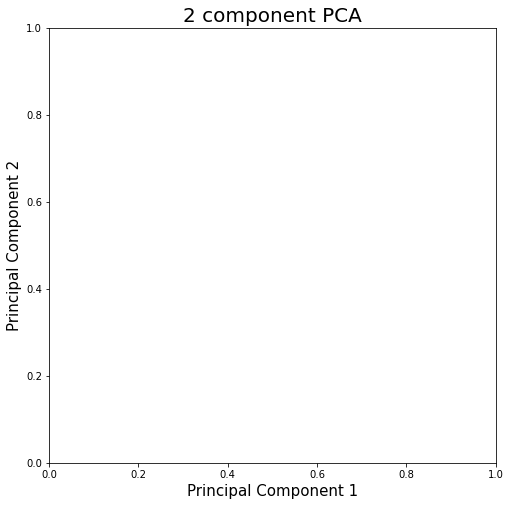

In [96]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf3 == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_pred == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()